<strong>2010 Chile earthquake</strong>
    
The 2010 Chile earthquake (Spanish: Terremoto del 27F[5]) occurred off the coast of central Chile on Saturday, 27 February at 03:34 local time (06:34 UTC), having a magnitude of 8.8 
The earthquake triggered a tsunami which devastated several coastal towns in south-central Chile and damaged the port at Talcahuano. Tsunami warnings were issued in 53 countries,
https://en.wikipedia.org/wiki/2010_Chile_earthquake

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/2010_Chile_earthquake_epicenter.png" alt="2010 Chile EQ">

Our goal with this notebook will be to plot the earthquakes before the magnitude 6.3 mainshock on April 6, 2009 to see whether there was an unusual pattern in the days leading up to the mainshock.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("IRIS")

<B> SET SEARCH PARAMETERS HERE <B/>

In [2]:
startt=UTCDateTime("2000-02-27")
endt=UTCDateTime("2010-02-27")
lon=-72.733
lat = -35.909
maxrad = 1.0
minmag = 2.0

Get events from the paramaters into a catalog,the catalog request can take a few minutes to complete if the number of events being requested is large.

In [3]:
cat=client.get_events(starttime=startt,endtime=endt,latitude=lat,longitude=lon,maxradius=maxrad,minmagnitude=minmag,catalog="ISC")

In [4]:
print(cat)

496 Event(s) in Catalog:
2010-02-22T16:55:42.900000Z | -35.058,  -72.828 | 3.9 ML
2010-02-22T14:00:14.400000Z | -34.980,  -72.842 | 3.8 ML
...
2000-05-03T20:15:38.860000Z | -36.389,  -71.984 | 3.3 mb
2000-03-01T19:37:57.690000Z | -35.611,  -71.828 | 3.3 MD
To see all events call 'print(CatalogObject.__str__(print_all=True))'


The next part of the processing will be to create a pair of lists (1 column arrays) that will contain the origin time and the event magnitudes. check https://docs.obspy.org/packages/obspy.core.html#event-metadata

In [5]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
print(times[4],mags[4])

2010-02-05 10:40:22.100000 3.5


In [6]:
mtimes=mdates.date2num(times)
print(mtimes[4],mags[4])

14645.4447002 3.5


We are going to make a plot that shows the magnitude of all earthquakes in the catalog over time. 

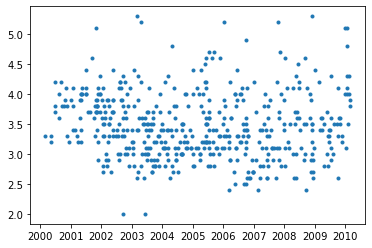

In [7]:
fig1=plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.')
plt.show()

The magnitudes of earthquakes does not appear to be unusual in the weeks before the 2010 earthquake

it would make sense to also investigate whether the seismicity rate changed in the days leading up to the 2009 earthquake

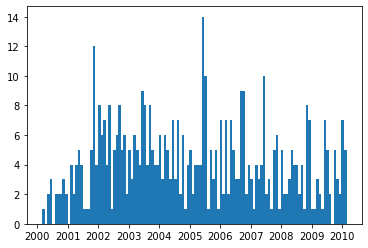

In [8]:
fig2, axes = plt.subplots(1,1)
axes.hist(mtimes,bins=120)
axes.xaxis.set_major_locator(mdates.YearLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.show()

The seismicity rate was high right before the 2009 earthquake, but it has been higher within the prior 10 years without producing a M>6 earthquake.